In [2]:
$$\large Example \, text \, in \, Ipython$$

* Item 1
* Item 2
    * Subitem a
        1. Otro
        2. Otro mas
    * Subitem b
        - Otro
        + Otro mas
* Item 3

Este es un texto comun.

*Este es un texto en cursiva*

**Este es un texto en negrita**

[Este es un link hacia google](http://google.com)

SyntaxError: invalid syntax (<ipython-input-2-185c0c777aee>, line 1)

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt



##  Leo el archivo events y lo referencio como dataframe

In [4]:
trocafone = pd.read_csv('/home/jonathan/Escritorio/orgaDeDatos/fiuba-trocafone-tp1-final-set/events.csv',low_memory = False)

In [5]:
#Primer vistazo del archivo
trocafone.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Miro las distintas categorias 
trocafone.count()

timestamp                   1011288
event                       1011288
person                      1011288
url                           82756
sku                          563838
model                        564284
condition                    563836
storage                      563836
color                        563836
skus                         221699
search_term                   48967
staticpage                     3598
campaign_source               82796
search_engine                 50957
channel                       87378
new_vs_returning              87378
city                          87378
region                        87378
country                       87378
device_type                   87378
screen_resolution             87378
operating_system_version      87378
browser_version               87378
dtype: int64

In [7]:
#Miro la variedad de tipos de datos presentes en el archivo
trocafone.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

### Se puede ver como pandas setea todo en object inicialmente

In [8]:
#Cambio el formato de la columna 'timestamp'
trocafone['timestamp'] = pd.to_datetime(trocafone['timestamp'], errors='raise', box = True)

#Filtro la variedad de eventos
eventos = trocafone['event'].value_counts()

In [9]:
#Cantidad por evento
eventos

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [10]:
#Miro el tipo de dato que es eventos
type(eventos)

pandas.core.series.Series

Text(0,0.5,'Cantidad por evento')

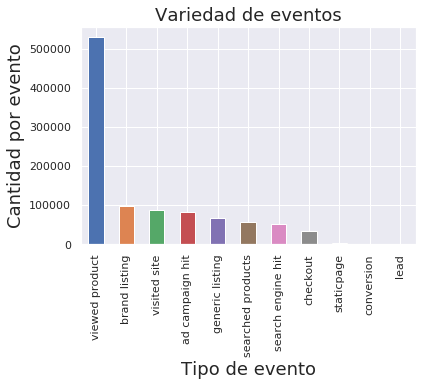

In [11]:
#Hago un pequenio grafico de barras de la cantidad por variedad de eventos 
eventos.plot(kind='bar')
plt.title('Variedad de eventos', fontsize = 18)
plt.xlabel('Tipo de evento', fontsize = 18)
plt.ylabel('Cantidad por evento', fontsize = 18)


In [12]:
eventsAndCountries = trocafone[['event','country']].dropna()

In [13]:
eventosXPais = eventsAndCountries[(eventsAndCountries['country'] != 'Unknown') & (eventsAndCountries['event'])]

In [14]:
df2 = (eventosXPais.groupby('country')['event'].agg({'event' : 'count'}))
df2


/home/jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,event
country,
Algeria,1
Angola,2
Argentina,94
Bangladesh,4
Belize,1
Brazil,84308
Canada,35
Cape Verde,1
China,1


In [15]:
df3 = df2.reset_index()

df3["event_log"] = np.log(df3["event"]+1)


## Cantidad de visitas por pais

Text(0,0.5,'Paises')

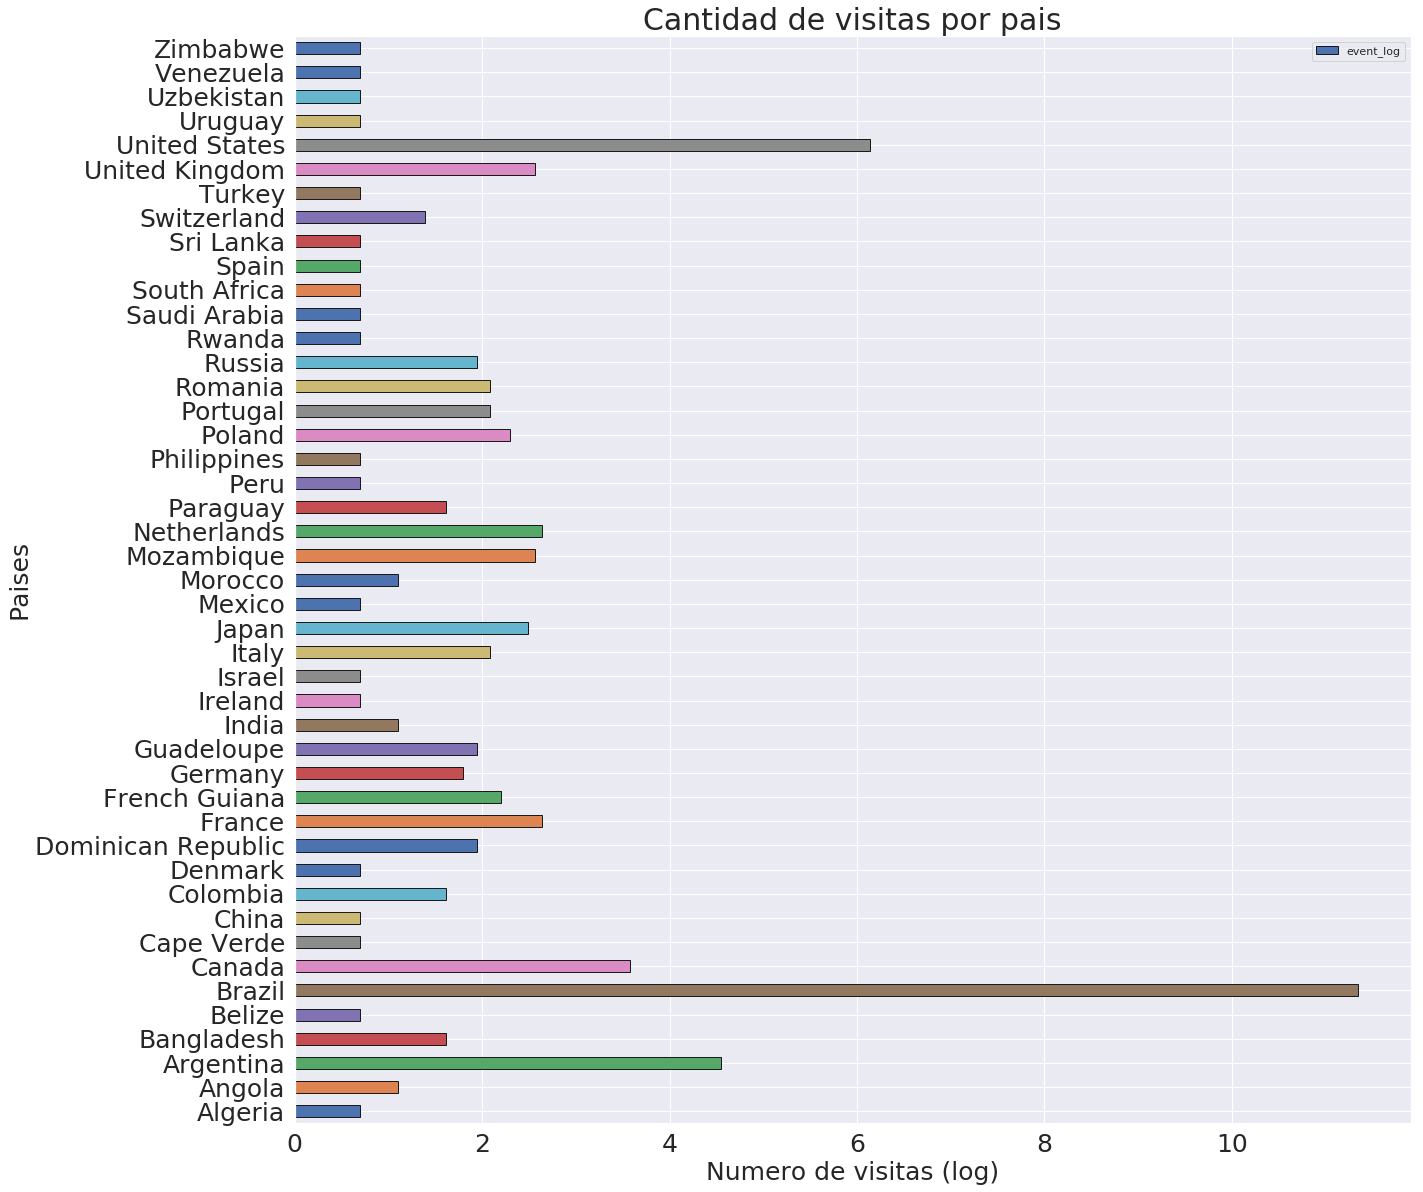

In [16]:

# Ploteo la cantidad de visitas por pais
g = df3.plot.barh(x='country', y='event_log',fontsize = 25,figsize=(20, 20), edgecolor='k')

plt.title('Cantidad de visitas por pais', fontsize = 30)
plt.xlabel('Numero de visitas (log)', fontsize = 25)
plt.ylabel('Paises', fontsize = 25)


## 10 dispositivos con mayor cantidad de conversiones

/home/jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


Text(0.5,0,'Conversiones')

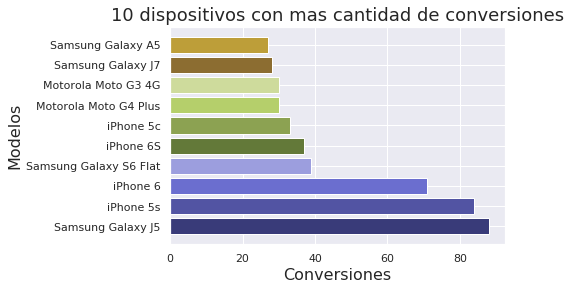

In [86]:
#Me quedo con las columnas relevantes
models = trocafone[(trocafone['event'] == 'conversion') & (trocafone['model'] != 'NaN')]

#Cuento cantidad de conversiones por modelo
conversionesForModel = models.groupby('model')['event'].agg({'event' : 'count'})

#Me quedo con los 10 de mayor cantidad
conv = conversionesForModel.sort_values(by='event', ascending=False).head(10).reset_index()

#convierto a dataframe
df = pd.DataFrame(data=conv)

# Ploteo los 10 modelos de telefonos con mas cantidad de conversiones
#g = df.plot.barh(x='model', y='event',fontsize = 18, figsize=(16, 12), edgecolor='k')

# Otra manera de plot
plt.barh(range(len(df)), df["event"], color =plt.cm.tab20b(np.arange(len(df['model']))))
ind = np.arange(len(df['model'])) 
plt.yticks(ind, (df['model']))

plt.title('10 dispositivos con mas cantidad de conversiones', fontsize = 18)
plt.ylabel('Modelos', fontsize = 16)
plt.xlabel('Conversiones', fontsize = 16)

### El mas vendido es el J5 de Samsung concluyo por ser de los mas economicos.

## Modelos de dispositivos : checkout, conversion, lead y viewed_product

Text(66.5,0.5,'Modelos')

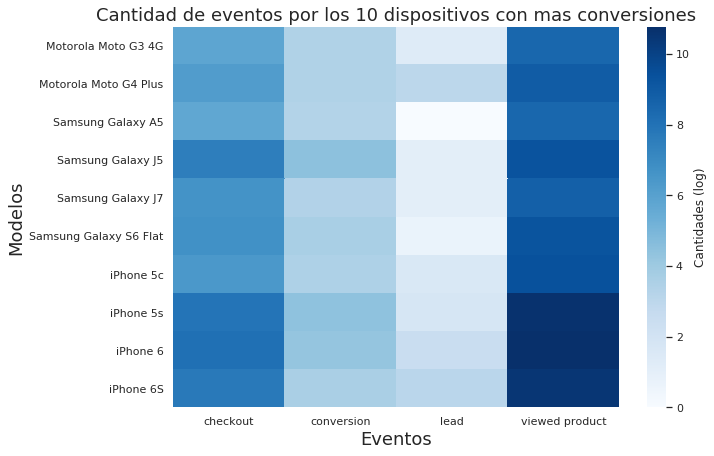

In [204]:
#Me quedo en otro con eventos y modelos
troca = trocafone[['model','event']].dropna()

#Armo un array de los 10 modelos con mas conversiones
modelosPopulares = df['model'].values
#Me quedo con los 10 modelos que tienen mas conversiones
modelosYEventos = troca[troca['model'].isin(modelosPopulares)]

#Acoto el array de labels
modelosPopulares = ['iPhone 5s', 'iPhone 6S','Galaxy J5' , 'iPhone 5c', 'iPhone 6','Galaxy S6 Flat', \
                    'Moto G3 4G' ,'Galaxy J7' ,'Moto G4 Plus', 'Galaxy A5']

#creo un crosstab
forHeat = pd.crosstab(modelosYEventos.model, modelosYEventos.event)
#aplico log
forHeat['checkout'] = np.log(forHeat["checkout"]+1)
forHeat['conversion'] = np.log(forHeat["conversion"]+1)
forHeat['lead'] = np.log(forHeat["lead"]+1)
forHeat['viewed product'] = np.log(forHeat["viewed product"]+1)

#plot
fig,ax = plt.subplots(figsize=(10,7))
g = sns.heatmap(forHeat,  cmap="Blues", ax=ax,cbar_kws={'label': 'Cantidades (log)'})

plt.title('Cantidad de eventos por los 10 dispositivos con mas conversiones', fontsize = 18)
plt.xlabel('Eventos', fontsize = 18)
plt.ylabel('Modelos', fontsize = 18)




In [164]:
 forHeat


event,checkout,conversion,lead,viewed product
model,,,,
Motorola Moto G3 4G,1.921600,30,3,4783
Motorola Moto G4 Plus,1.978578,30,20,7522
Samsung Galaxy A5,1.905622,27,0,4707
Samsung Galaxy J5,2.147049,88,2,11036
Samsung Galaxy J7,2.037582,28,2,6376
Samsung Galaxy S6 Flat,2.046316,39,1,10724
iPhone 5c,2.001963,33,4,12049
iPhone 5s,2.188020,84,5,42045
iPhone 6,2.208325,71,12,47538


## Conversiones en funcion del almacenamiento de los dispositivos

In [22]:
almac = trocafone[(trocafone['event'] == 'conversion') & (trocafone['storage'] != 'NaN')]

In [23]:
almacenamiento = almac.groupby('storage')['event'].agg({'event' : 'count'}).reset_index().sort_values("event")
almacenamiento

/home/jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,storage,event
2,256GB,1
5,512MB,3
4,4GB,17
0,128GB,27
6,64GB,102
7,8GB,205
3,32GB,265
1,16GB,552


Text(0.5,8.96,'Capacidad')

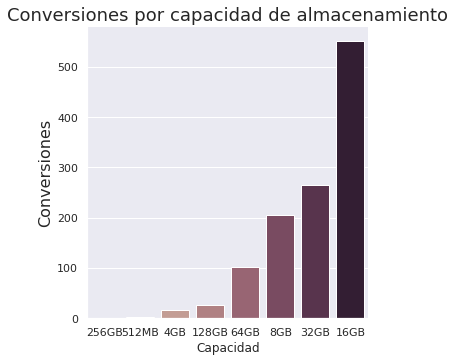

In [27]:
sns.catplot(x="storage", y="event", kind = "bar", palette="ch:.25", data = almacenamiento)
plt.title('Conversiones por capacidad de almacenamiento', fontsize = 18)
plt.ylabel('Conversiones', fontsize = 16)
plt.xlabel('Capacidad', fontsize = 12)


## Cantidad de eventos por mes

Text(0.5,1,'Eventos por mes (2018)')

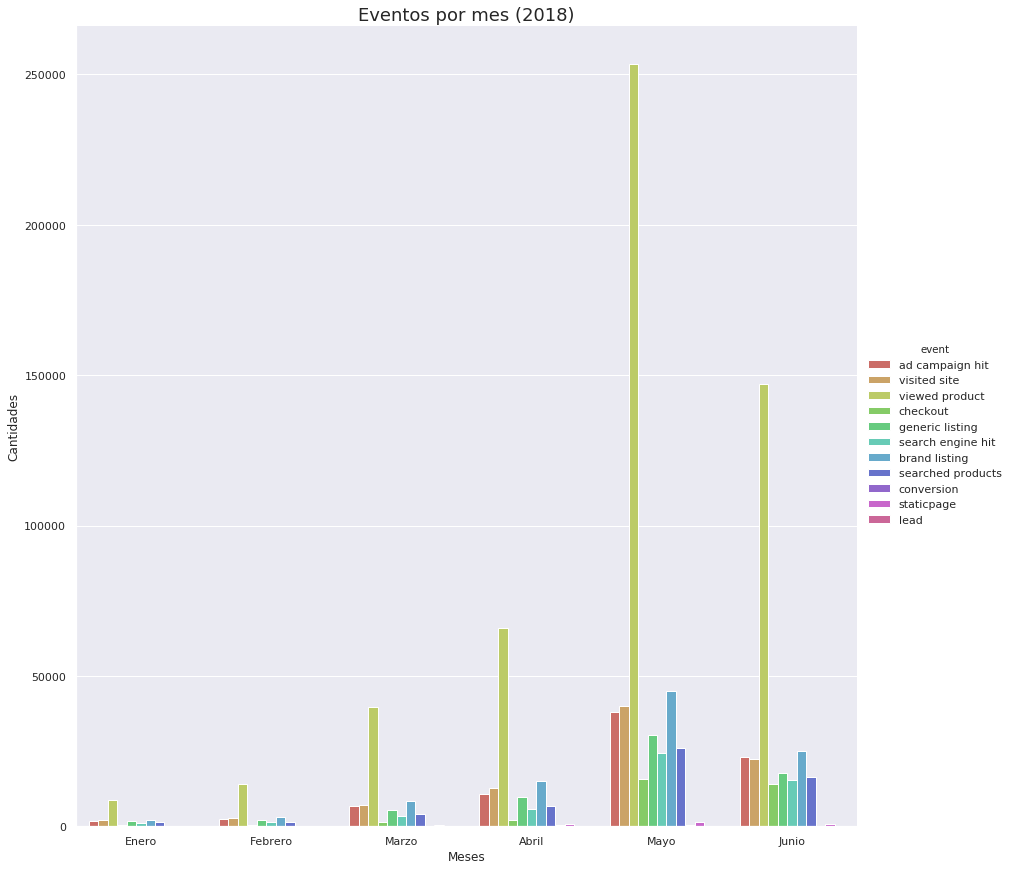

In [21]:
tr = trocafone[(trocafone['timestamp'] != 'NaN')  &  (trocafone['event'] !='NaN')]
tr['month'] = tr['timestamp'].dt.month

#variedades de eventos por mes 
pd.crosstab(tr.month, tr.event)
g = sns.catplot(x="month", hue="event", data=tr, kind="count", palette="hls", height = 12,aspect = 1)
(g.set_axis_labels("Meses", "Cantidades").set_xticklabels(["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio"])\
     .set_titles("{col_name} {col_var}", fontsize = 30))
plt.title('Eventos por mes (2018)', fontsize = 18)


#### Se puede ver que en Junio la web tuvo baja cantidad de conversiones y comparando con Mayo parece que es propocional a la cantidad de checkouts, es decir la web tuvo su auge semestral maximo en Mayo  y luego se normalizo en Junio.

In [124]:
trocafone['campaign_source'].dropna().value_counts()

google              58153
criteo               9694
rtbhouse             8550
zanox                1673
emblue               1352
FacebookAds           764
afilio                692
bing                  484
voxus                 432
rakuten               310
indexa                154
buscape               141
manifest              126
Facebook               77
datacrush              60
blog                   37
afiliado               34
yotpo                  25
mercadopago            18
FacebookSocial          8
MARKETING SOCIAL        7
onsite                  3
socialmedia             1
Google Social           1
Name: campaign_source, dtype: int64

In [125]:
trocafone['search_engine'].dropna().value_counts()

Google    50240
Bing        424
Yahoo       287
Ask           6
Name: search_engine, dtype: int64

In [128]:
trocafone['person'].dropna().value_counts()

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
d9251b63    1234
c501ff3a    1201
778fcfbd    1195
a7d3181e    1185
e2b0ce1b    1168
c38d5de3    1162
6d2fe2db    1110
88cabe99    1073
ba102035    1014
ff9dc4b8    1005
b7db0194    1003
a94ab0df     990
e27ec493     978
55d9fd71     973
8e0c69f6     958
63112254     955
d5661793     950
badaab79     930
3444791f     913
9fdfd942     907
            ... 
25aa4cb5       1
7dd7b2be       1
bfb05658       1
142d70d8       1
068f9114       1
5c61b14a       1
3531c964       1
3680696e       1
2282e818       1
3a3f6b0a       1
dd80f303       1
d57b091b       1
a33b1b4f       1
91e2563e       1
37a61159       1
90c60011       1
ddb0832f       1
1486947d       1
b29ab778       1
b1453674       1
c82d1286       1
61053b3c       1
b766c6bb       1
561b2e95       1
f6d97ad4       1
5ad6e422       1
bec2bbe5       1
b65007ce      

## 10 Usuarios que entraron en el checkout pero no realizaron alguna conversion


## 20 users que realizaron mas conversiones mediante algun search_engine

## comparacion de dias de mayor de cantidad de conversiones de usuarios en brasil, argentina, usa, canada y united kingdoms

## conversiones en funcion de las staticpages visitadas

## Horarios de mayor compra(conversion) en Argentina, Brasil, Usa

## Variedad de eventos en los 10 paises de mas eventos

## 5 Regiones con mayor cantidad de eventos de Brasil, Argentina, Usa y Canada 

## Numero de viewed_products que realizaron conversion en funcion de la resolucion del dispositivo utilizado para acceder

## Dispositivos mas buscados en searched_products

In [ ]:
## 